In [1]:

import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
def equalize_histogram(image: np.ndarray) -> np.ndarray:
    if len(image.shape) > 2 and image.shape[2] == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image
        
    return cv2.equalizeHist(gray_image)

In [ ]:
def plot_hist_normalized(image: np.ndarray):

    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    
    ax[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cmap='gray')
    ax[0, 0].set_title('Original Image')
    ax[0, 0].axis('off')

    hist1 = cv2.calcHist([image], [0], None, [256], [0, 256])
    ax[1, 0].plot(hist1)
    ax[1, 0].set_title(f"Histogram original")
    ax[1, 0].set_xlim([0, 256])

    eq = equalize_histogram(image)
    ax[0, 1].imshow(eq, cmap='gray')
    ax[0, 1].set_title('Equalized image')
    ax[0, 1].axis('off')
    
    hist2 = cv2.calcHist([eq], [0], None, [256], [0, 256])
    ax[1, 1].plot(hist2)
    ax[1, 1].set_title(f"Histogram equalized")
    ax[1, 1].set_xlim([0, 256])
    
    plt.tight_layout()
    plt.show()
    
    plt.tight_layout()
    plt.show()

In [38]:
import os 
BASE_DIR = 'dataset'
IMAGE_DIR = os.path.join(BASE_DIR, 'images')

In [83]:
samples = os.listdir(IMAGE_DIR)[:3]

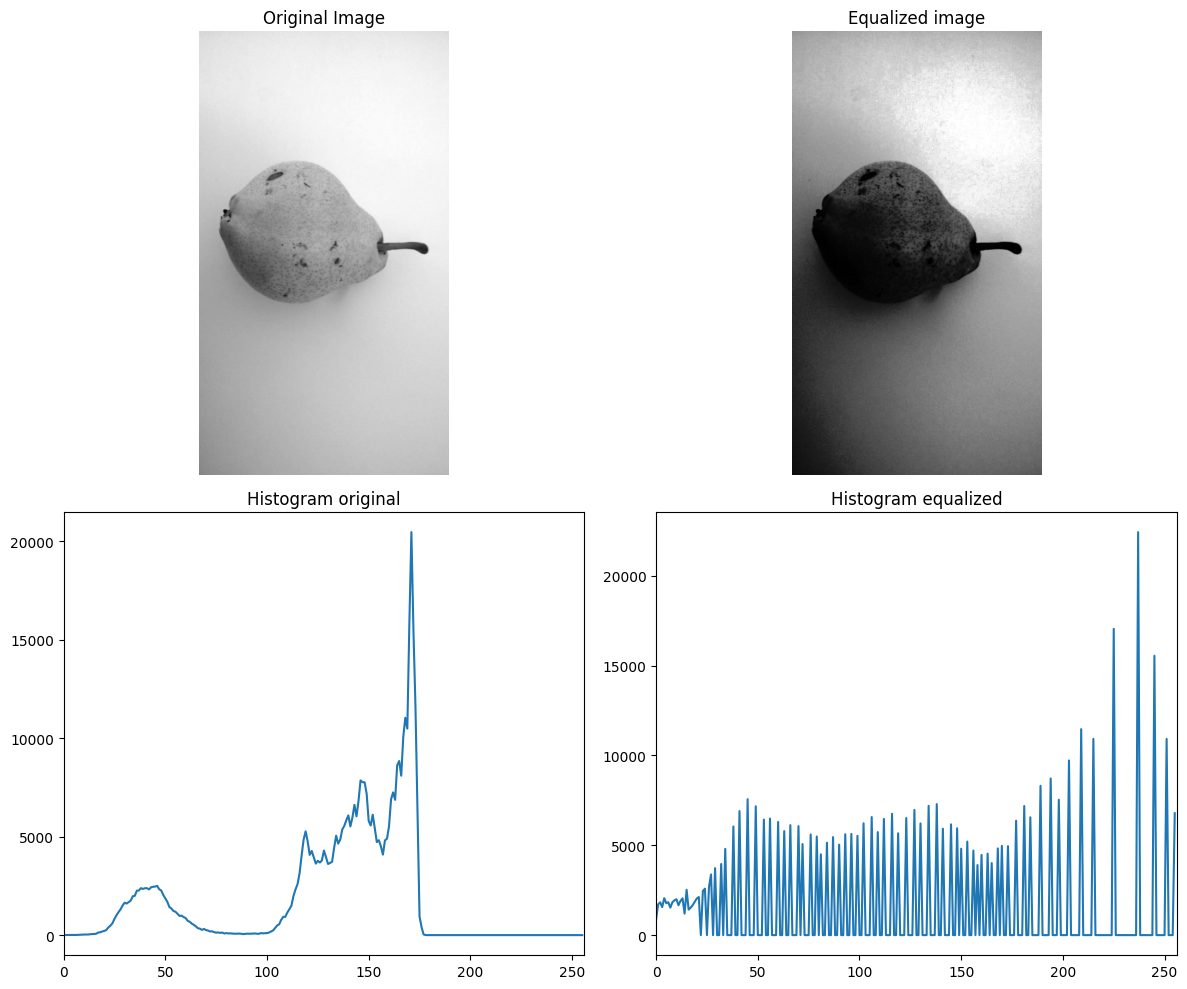

<Figure size 640x480 with 0 Axes>

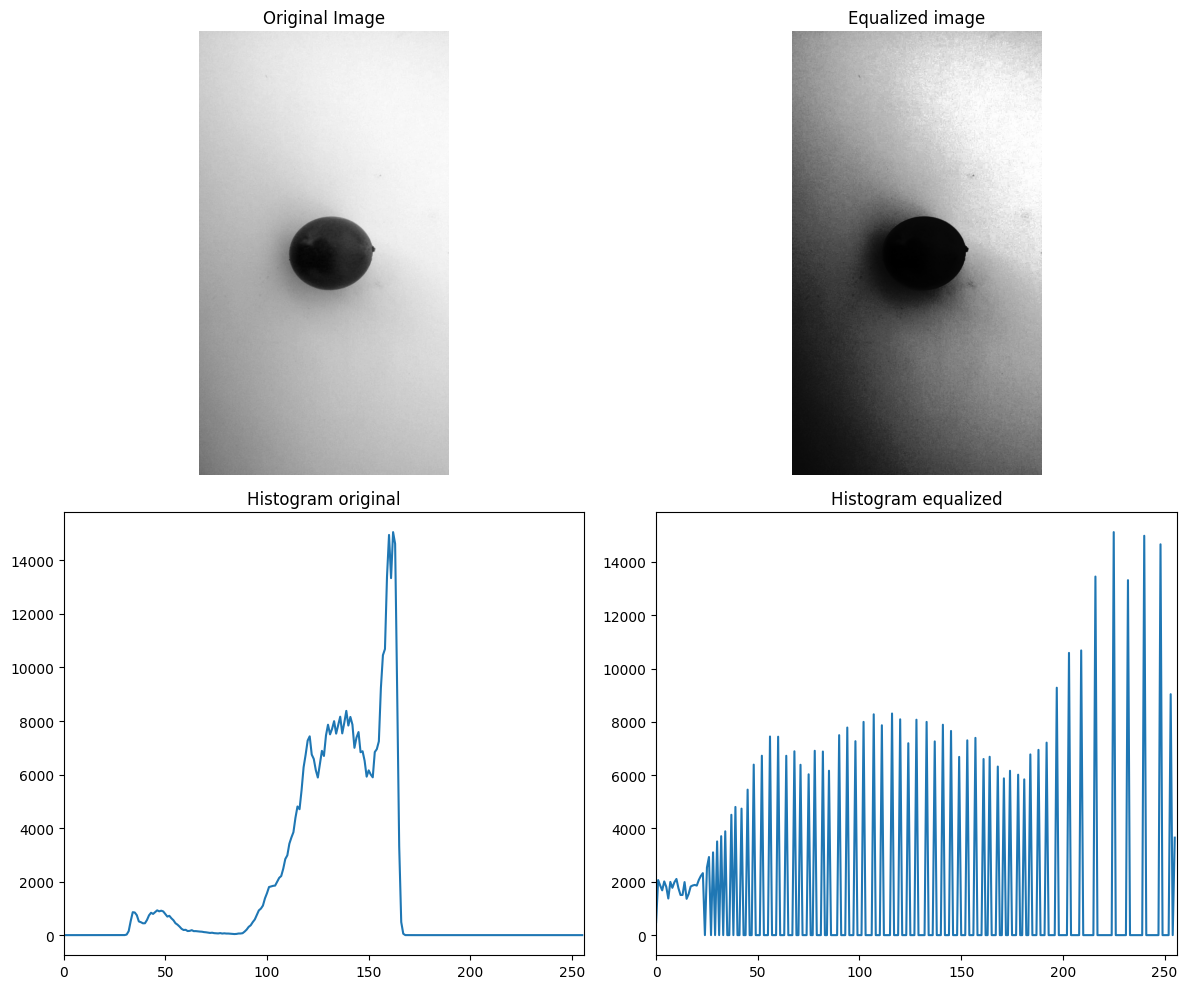

<Figure size 640x480 with 0 Axes>

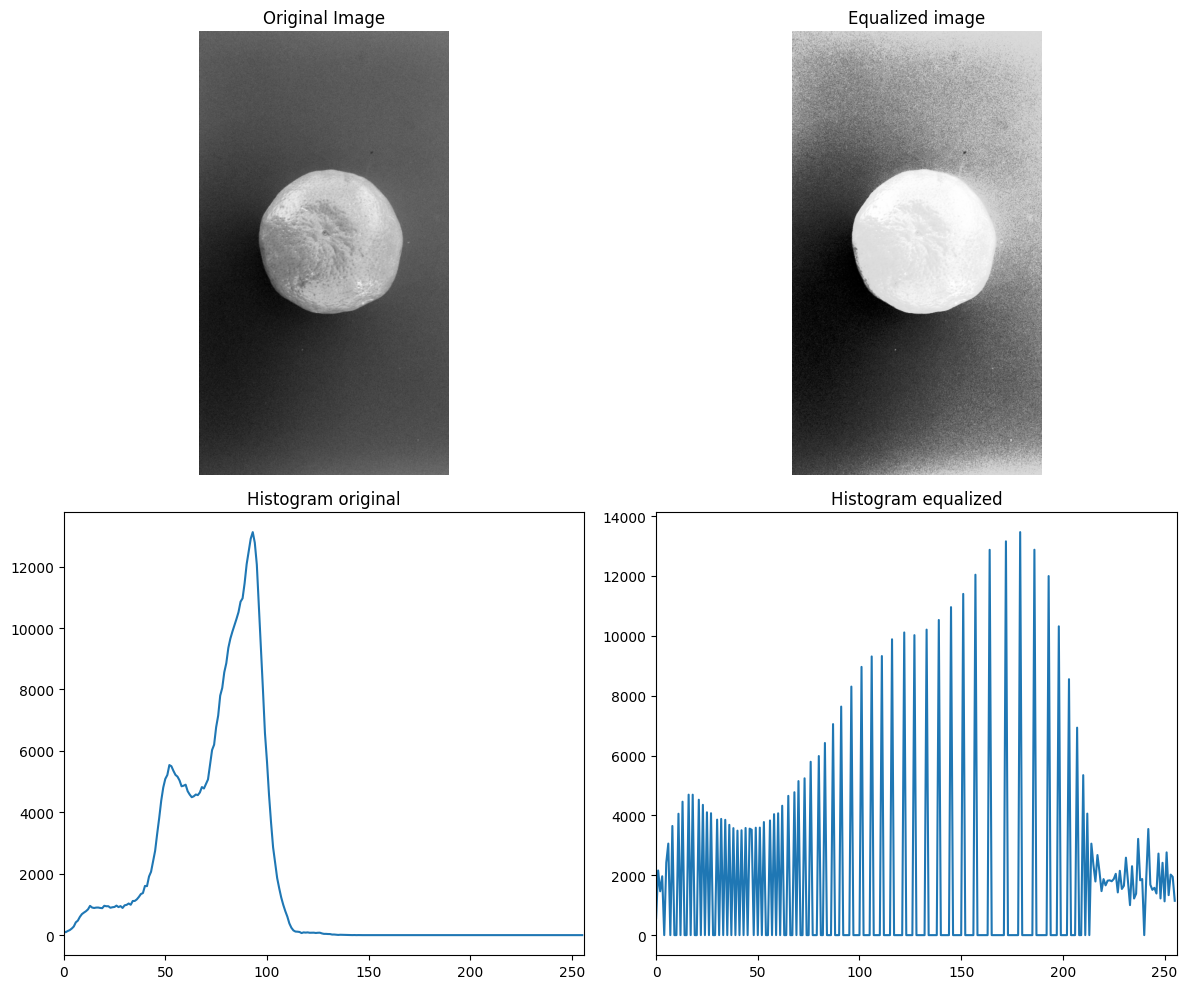

<Figure size 640x480 with 0 Axes>

In [84]:
for sample in samples:
    image_path = os.path.join(IMAGE_DIR, sample)
    image = cv2.imread(image_path) 
    plot_hist_normalized(image)

In [72]:
PROTOTYPE_DIM = (910, 512)

In [77]:
def calculate_class_statistics(class_path: str, begin_id: str):
    image_files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.startswith(begin_id) and f.endswith(('.png', '.jpg', '.jpeg'))]

    # Inicializa acumuladores
    sum_prototype = np.zeros(PROTOTYPE_DIM, dtype=np.float64)
    sum_hist = np.zeros((256, 1), dtype=np.float64)
    sum_sq_hist = np.zeros((256, 1), dtype=np.float64)
    image_count = len(image_files)

    for img_file in image_files:
        img_gray = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
        if img_gray is None:
            continue

        sum_prototype += img_gray.astype(np.float64)
        normalized_img = equalize_histogram(img_gray)
        
        hist = cv2.calcHist([normalized_img], [0], None, [256], [0, 256])
        
        sum_hist += hist
        sum_sq_hist += (hist ** 2)

    mean_prototype = (sum_prototype / image_count).astype(np.uint8)
    mean_hist = sum_hist / image_count
    
    # Var(X) = E[X^2] - (E[X])^2
    mean_of_sq_hist = sum_sq_hist / image_count
    hist_variance = mean_of_sq_hist - (mean_hist ** 2)
    
    return mean_prototype, mean_hist, hist_variance

In [81]:
def plot_results(class_name: str, prototype: np.ndarray, mean_hist: np.ndarray, hist_variance: np.ndarray):
    """
    Exibe os resultados calculados para uma classe usando Matplotlib.
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle(f'{class_name}', fontsize=16)

    # 1. Protótipo Médio
    ax1.imshow(prototype, cmap='gray')
    ax1.set_title("Protótipo Médio")
    ax1.axis('off')

    # 2. Histograma Médio
    ax2.plot(mean_hist)
    ax2.set_title("Histograma Médio")
    ax2.set_xlim([0, 256])
    ax2.set_xlabel("Intensidade do Pixel")
    ax2.set_ylabel("Frequência Média")

    # 3. Variância do Histograma
    ax3.plot(hist_variance)
    ax3.set_title("Variância do Histograma")
    ax3.set_xlim([0, 256])
    ax3.set_xlabel("Intensidade do Pixel")
    ax3.set_ylabel("Variância")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

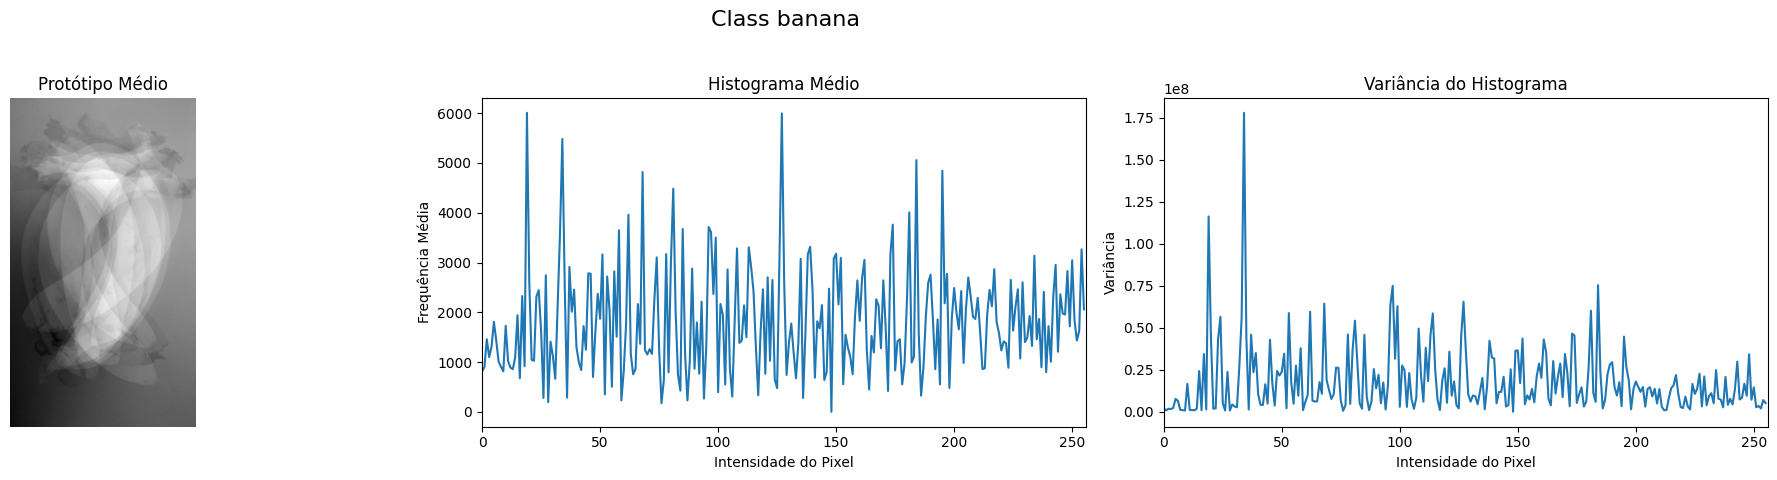

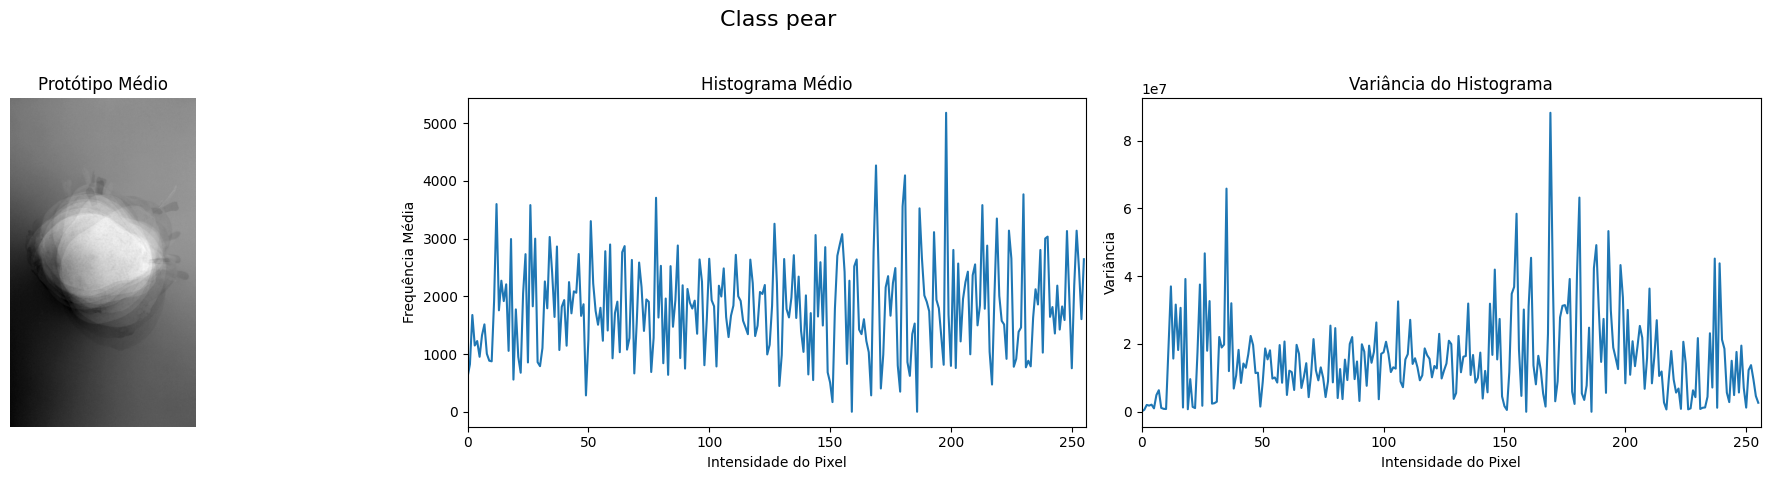

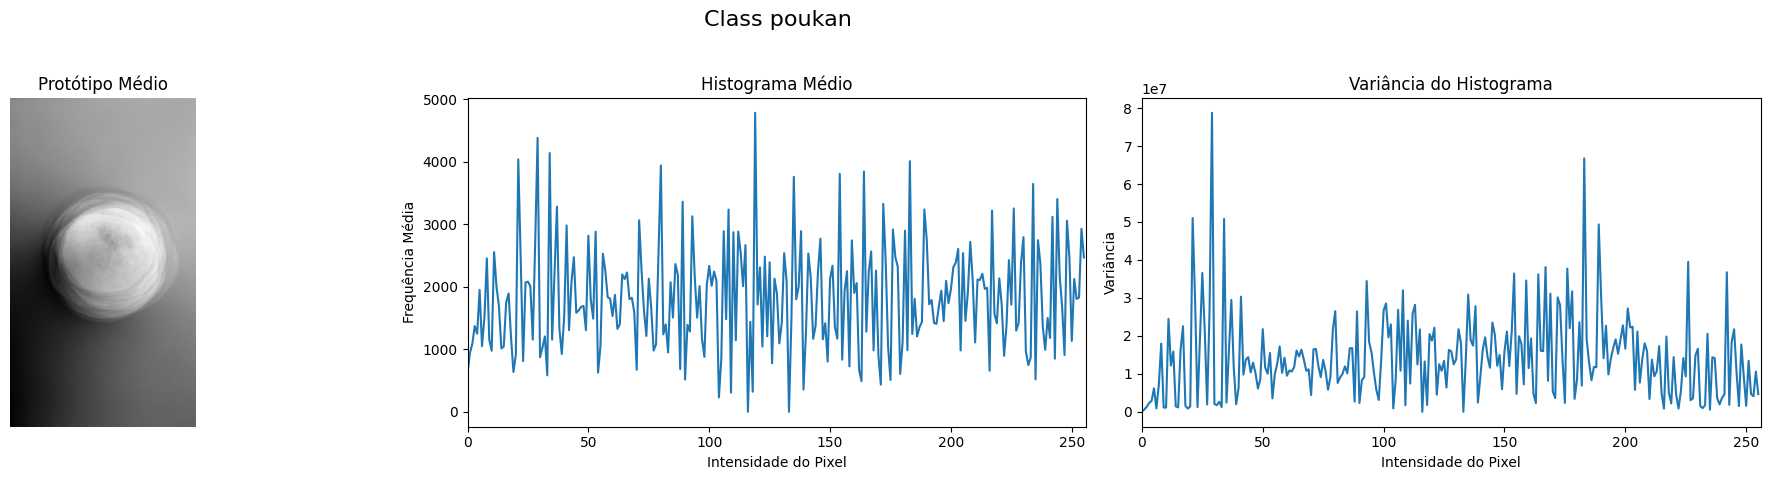

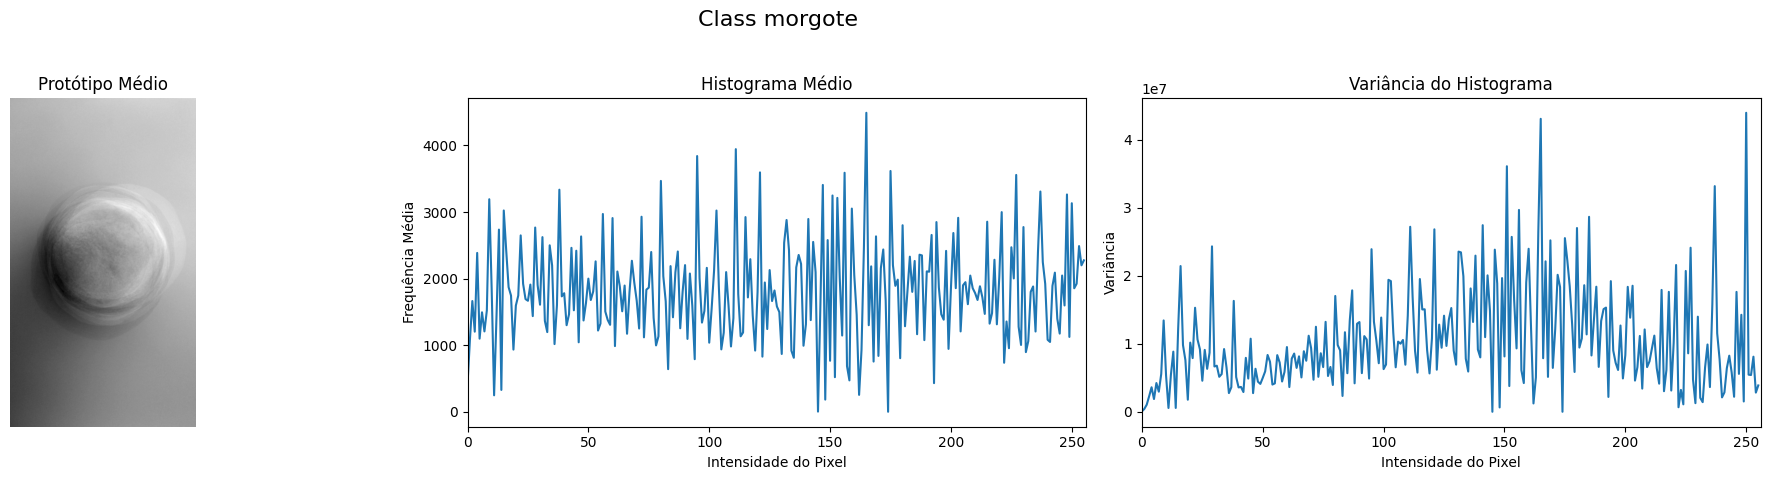

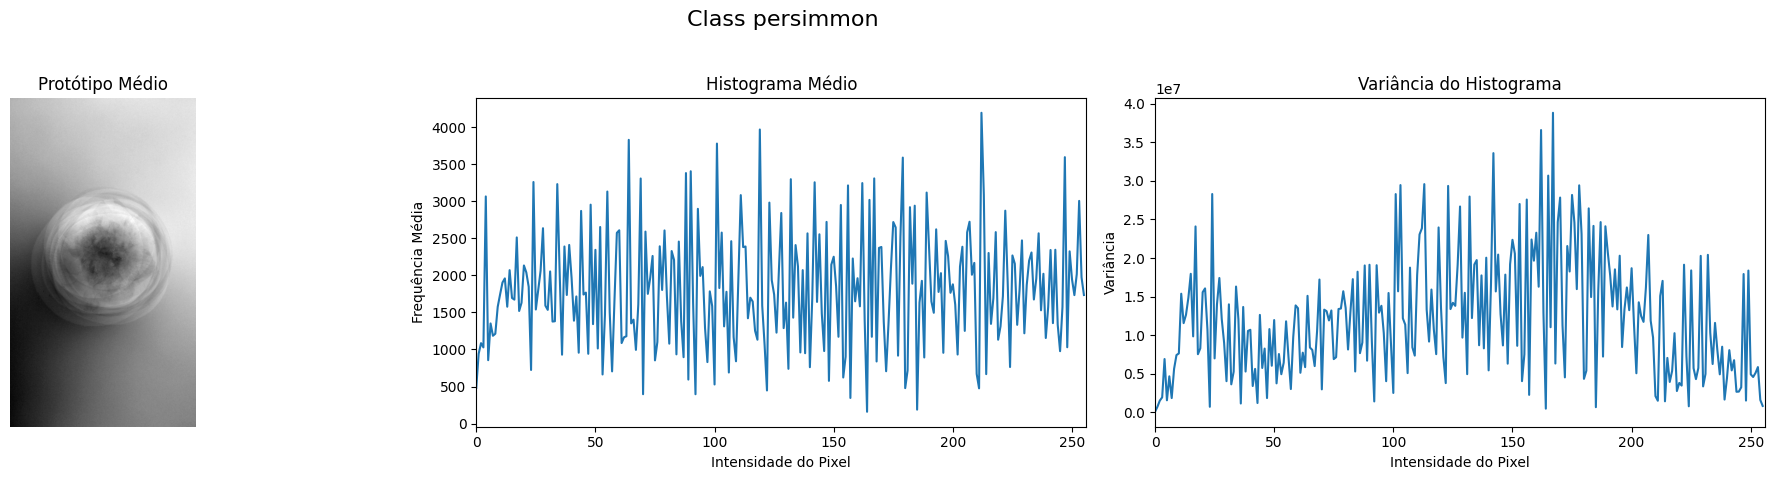

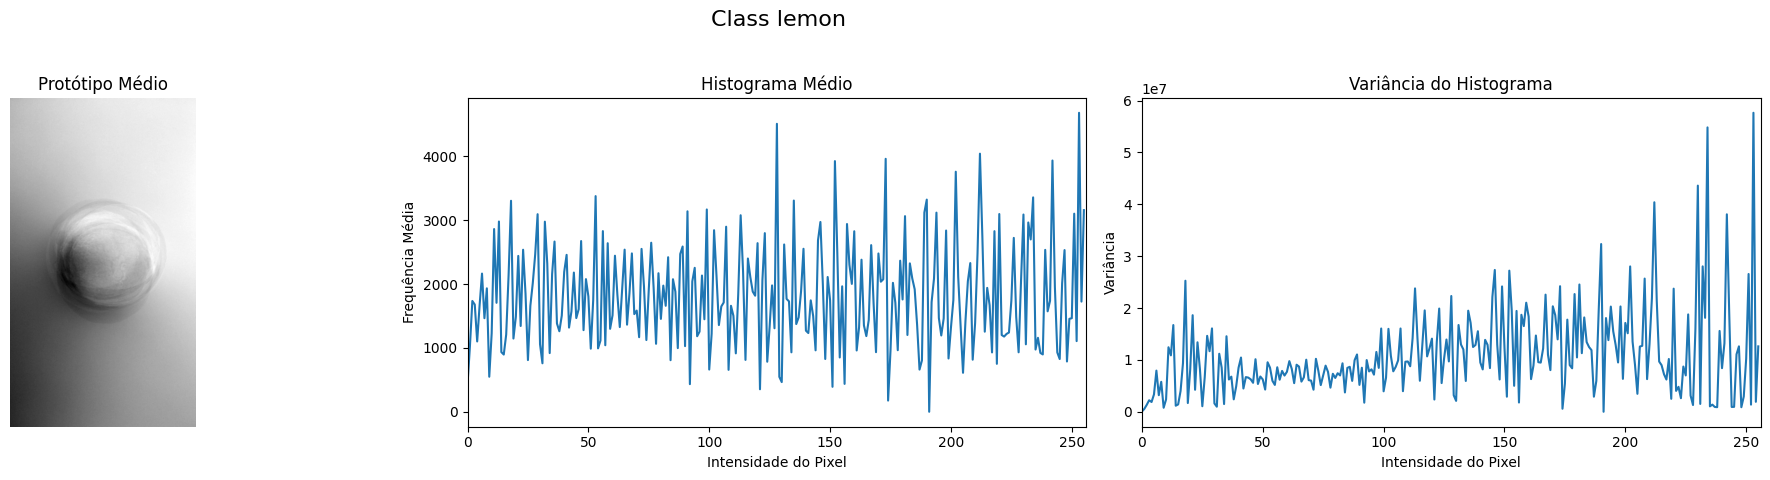

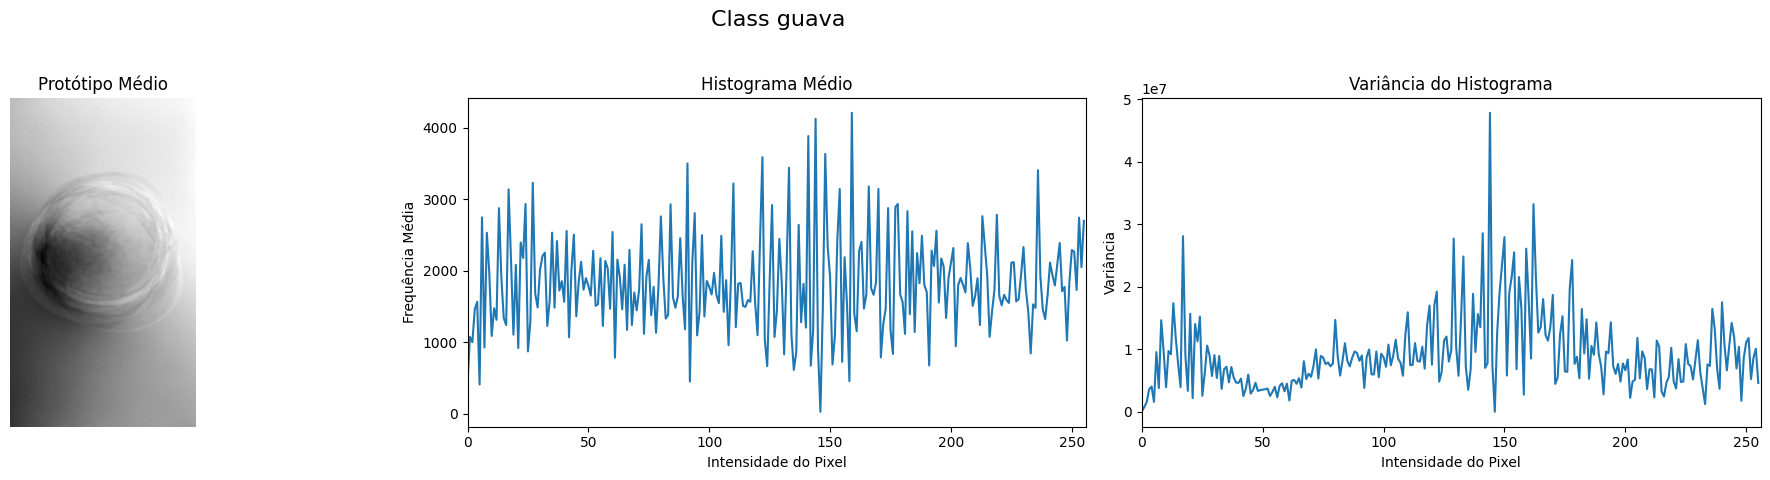

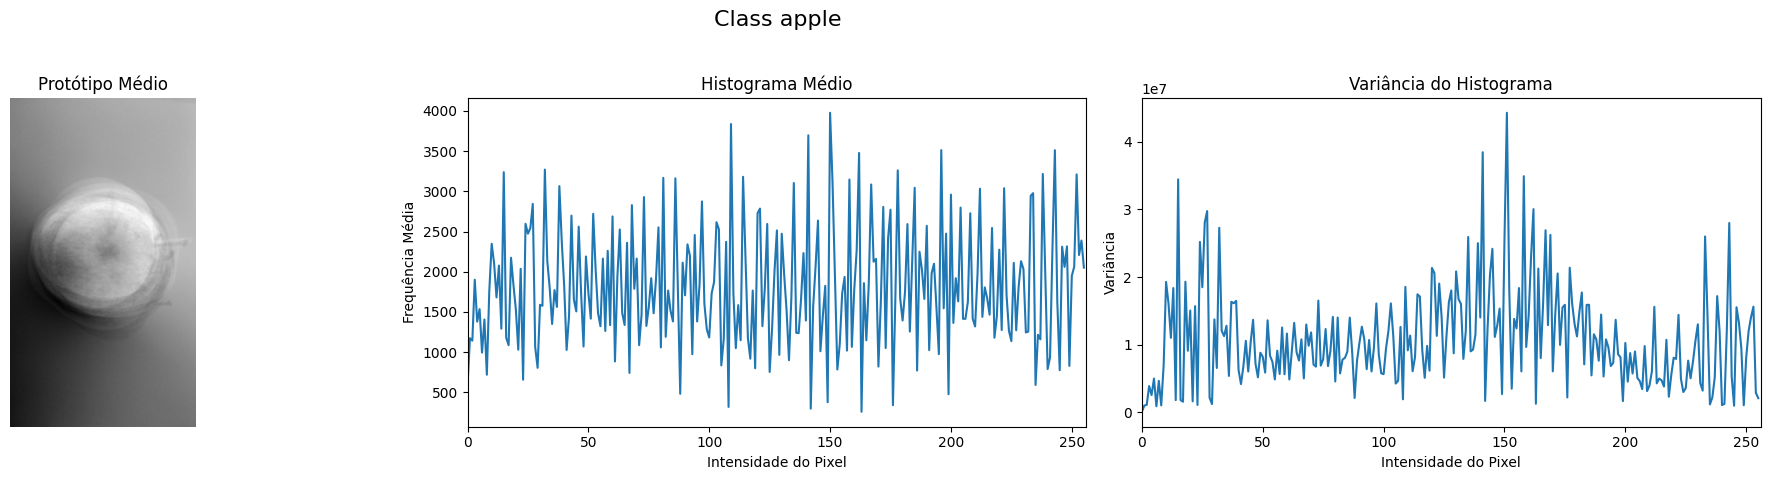

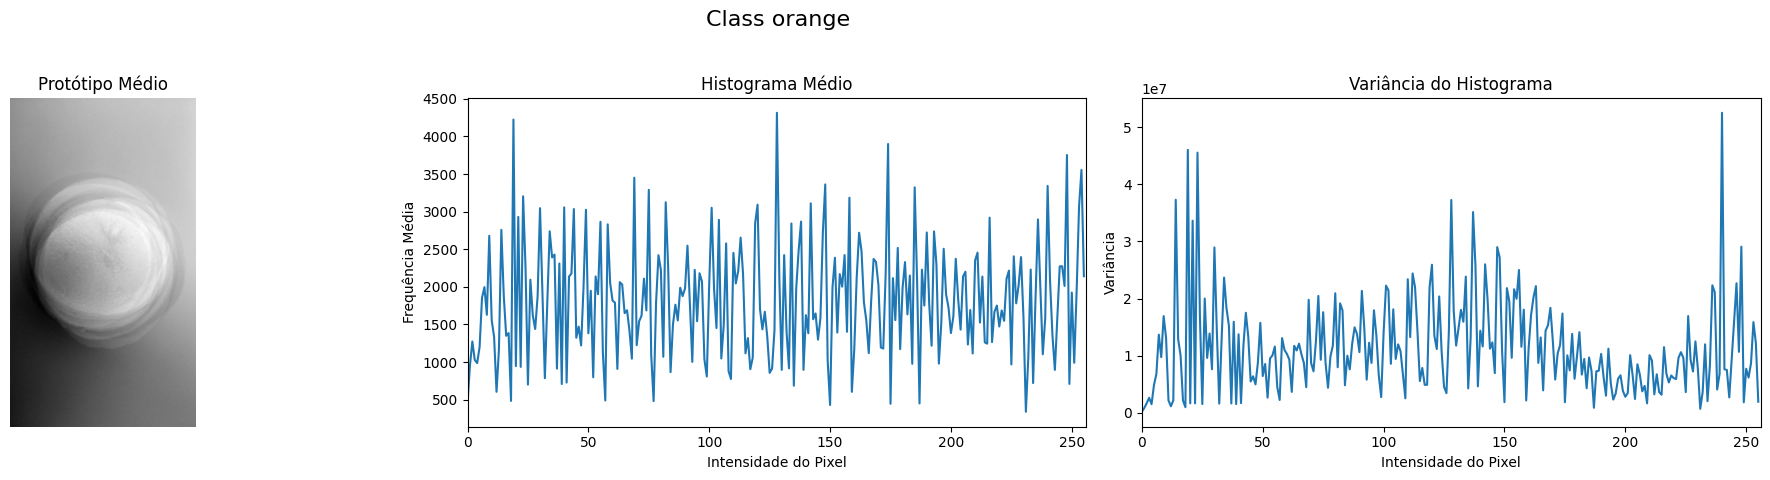

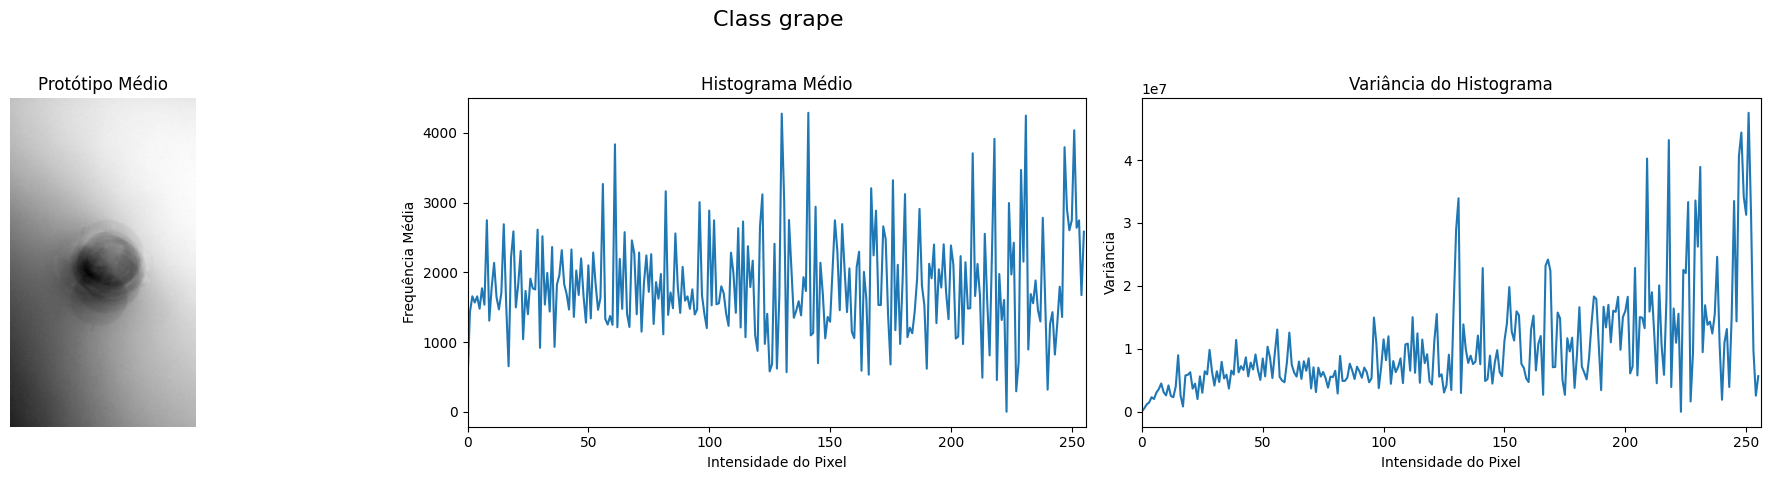

In [82]:
classes = {
    '0': 'banana',
    '1': 'pear',
    '2': 'poukan',
    '3': 'morgote',
    '4': 'persimmon',
    '5': 'lemon',
    '6': 'guava',
    '7': 'apple',
    '8': 'orange',
    '9': 'grape'
}
for i in range(10):
    p, h, v = calculate_class_statistics(os.path.join(BASE_DIR, 'images'), str(i))
    plot_results(f'Class {classes[str(i)]}', p, h, v)